In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils
import src.loader as loader

In [4]:
# read one of json file for test purpose"C:/Users/Diriba/Desktop/10AC/Projects/week0_starter_network_analysis/anonymized/
data = pd.read_json("C:/Users/Diriba/Desktop/10AC/Projects/week0_starter_network_analysis/anonymized/users.json")

In [5]:
# printing 5 rows from the top
data.head()

,id,team_id,name,deleted,color,real_name,tz,tz_label,tz_offset,profile,...,is_owner,is_primary_owner,is_restricted,is_ultra_restricted,is_bot,is_app_user,updated,is_email_confirmed,who_can_share_contact_card,is_invited_user
0,U03T89ACUUW,T03U4J8HMUG,Carlos,False,4bbe2e,Carlos Gross,Africa/Harare,Central Africa Time,7200.0,"{'title': '', 'phone': '', 'skype': '', 'real_...",...,1.0,0.0,0.0,0.0,False,False,1669395557,0.0,EVERYONE,NaN
1,U03TEPYRM2P,T03U4J8HMUG,Garrett,False,9f69e7,Garrett Bell,Africa/Algiers,Central European Time,3600.0,"{'title': '', 'phone': '', 'skype': '', 'real_...",...,1.0,1.0,0.0,0.0,False,False,1673852951,1.0,EVERYONE,NaN
2,U03TNP8Q8CT,T03U4J8HMUG,Bethany,False,e7392d,Bethany George,Africa/Algiers,Central European Time,3600.0,"{'title': '', 'phone': '', 'skype': '', 'real_...",...,0.0,0.0,0.0,0.0,False,False,1660570354,0.0,EVERYONE,1.0
3,U03TT5KEYCF,T03U4J8HMUG,Luis,False,e0a729,Luis Ingram,Africa/Algiers,Central European Time,3600.0,"{'title': '', 'phone': '', 'skype': '', 'real_...",...,0.0,0.0,0.0,0.0,False,False,1661268798,1.0,EVERYONE,NaN
4,U03TX2VN6H5,T03U4J8HMUG,Nicole,False,4cc091,Nicole Kim,Africa/Cairo,Eastern European Time,7200.0,"{'title': '', 'phone': '', 'skype': '', 'real_...",...,0.0,0.0,0.0,0.0,False,False,1660904839,1.0,EVERYONE,NaN


In [6]:
# printing 5 items from the bottom
data.tail()

,id,team_id,name,deleted,color,real_name,tz,tz_label,tz_offset,profile,...,is_owner,is_primary_owner,is_restricted,is_ultra_restricted,is_bot,is_app_user,updated,is_email_confirmed,who_can_share_contact_card,is_invited_user
66,U03V8LHPDME,T03U4J8HMUG,Mandy,False,e96699,Mandy Sweeney,America/New_York,Eastern Standard Time,-18000.0,"{'title': '', 'phone': '', 'skype': '', 'real_...",...,0.0,0.0,0.0,0.0,False,False,1667364708,1.0,EVERYONE,NaN
67,U03VAH809FC,T03U4J8HMUG,Paul,False,df3dc0,Paul Brown,America/Los_Angeles,Pacific Standard Time,-28800.0,"{'title': '', 'phone': '', 'skype': '', 'real_...",...,0.0,0.0,0.0,0.0,True,False,1661515236,0.0,EVERYONE,NaN
68,U0401GU4W6L,T03U4J8HMUG,Kathleen,False,2b6836,Kathleen Phillips,America/Los_Angeles,Pacific Standard Time,-28800.0,"{'title': '', 'phone': '', 'skype': '', 'real_...",...,0.0,0.0,0.0,0.0,True,False,1661252626,0.0,EVERYONE,NaN
69,U0418T6CD1B,T03U4J8HMUG,Kenneth,False,4cc091,Kenneth Fitzgerald,America/Los_Angeles,Pacific Standard Time,-28800.0,"{'title': '', 'phone': '', 'skype': '', 'real_...",...,0.0,0.0,0.0,0.0,True,False,1662534866,0.0,EVERYONE,NaN
70,U04718Y7SQ0,T03U4J8HMUG,Audrey,False,9b3b45,Audrey Parsons,America/Los_Angeles,Pacific Standard Time,-28800.0,"{'title': '', 'phone': '', 'skype': '', 'real_...",...,0.0,0.0,0.0,0.0,True,False,1665649740,0.0,EVERYONE,NaN


In [7]:
# print desccription of the data 
data.describe()

,tz_offset,is_admin,is_owner,is_primary_owner,is_restricted,is_ultra_restricted,updated,is_email_confirmed,is_invited_user
count,57.000000,57.000000,57.000000,57.000000,57.0,57.0,7.100000e+01,57.000000,1.0
mean,3410.526316,0.070175,0.070175,0.017544,0.0,0.0,1.672156e+09,0.859649,1.0
std,12987.489643,0.257713,0.257713,0.132453,0.0,0.0,1.243181e+07,0.350438,NaN
min,-28800.000000,0.000000,0.000000,0.000000,0.0,0.0,1.660570e+09,0.000000,1.0
25%,3600.000000,0.000000,0.000000,0.000000,0.0,0.0,1.663371e+09,1.000000,1.0
50%,10800.000000,0.000000,0.000000,0.000000,0.0,0.0,1.667401e+09,1.000000,1.0
75%,10800.000000,0.000000,0.000000,0.000000,0.0,0.0,1.676618e+09,1.000000,1.0
max,10800.000000,1.000000,1.000000,1.000000,0.0,0.0,1.700820e+09,1.000000,1.0


In [8]:
# know the shape of the data 
data.shape

(71, 21)

In [9]:
# print name of the data coumns
data.columns

Index(['id', 'team_id', 'name', 'deleted', 'color', 'real_name', 'tz',
       'tz_label', 'tz_offset', 'profile', 'is_admin', 'is_owner',
       'is_primary_owner', 'is_restricted', 'is_ultra_restricted', 'is_bot',
       'is_app_user', 'updated', 'is_email_confirmed',
       'who_can_share_contact_card', 'is_invited_user'],
      dtype='object')

### Columns we can get from a slack message<br>

message_type, message_content, sender_id, time_sent, message_distribution, time_thread_start, reply_count, reply_user_count, time_thread_end, reply_users

From a single slack message, we can get <br>

1. The message<br>
2. Type (message, file, link, etc)<br>
3. The sender_id (assigned by slack)<br>
4. The time the message was sent<br>
5. The team (i don't know what that is now)<br>
6. The type of the message (broadcast message, inhouse, just messgae)<br>
7. The thread the message generated (from here we can go):<br>
    7.1 Text/content of the message<br>
    7.2 The thread time of the message<br>
    7.3 The thread count (reply count)<br>
    7.4 The number of user that reply the message (count of users that participated in the thread)<br>
    7.5 The time the last thread message was sent <br>
    7.6 The users that participated in the thread (their ids are stored as well)<br>

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [10]:

# making the data ready for work on

data_loader = SlackDataLoader("C:/Users/Diriba/Desktop/10AC/Projects/week0_starter_network_analysis/anonymized")
path_channel = "C:/Users/Diriba/Desktop/10AC/Projects/week0_starter_network_analysis/anonymized"
df = data_loader.slack_parser(path_channel)
print(df.shape)
df.head()


(3342, 12)


,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel_name,channel
0,message,<https://towardsdatascience.com/how-to-fill-mi...,Anthony Galloway,1661158502.784099,link,0,0,0,0,0,all-week1,anonymized
1,message,"Imputation Using k-NN, Imputation Using Multiv...",Katie Dickerson,1661158692.172369,text,1661158692.172369,2,2,"U03U1GHT39V,U03UJGRN5E0",1661159006.632649,all-week1,anonymized
2,message,<https://towardsdatascience.com/6-different-wa...,Katie Dickerson,1661158702.777369,link,0,0,0,0,0,all-week1,anonymized
3,message,u can use SMOTE or mode to impute categorical ...,Joseph Diaz,1661158767.626859,text,1661158692.172369,0,0,0,0,all-week1,anonymized
4,message,:+1:thanks,Katie Dickerson,1661159006.632649,emoji,1661158692.172369,0,0,0,0,all-week1,anonymized


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   msg_type           3342 non-null   object
 1   msg_content        3342 non-null   object
 2   sender_name        3342 non-null   object
 3   msg_sent_time      3342 non-null   object
 4   msg_dist_type      3342 non-null   object
 5   time_thread_start  3342 non-null   object
 6   reply_count        3342 non-null   int64 
 7   reply_users_count  3342 non-null   int64 
 8   reply_users        3342 non-null   object
 9   tm_thread_end      3342 non-null   object
 10  channel_name       3342 non-null   object
 11  channel            3342 non-null   object
dtypes: int64(2), object(10)
memory usage: 313.4+ KB


In [25]:
# which user has the highest number of reply counts?
df.groupby('sender_name')['reply_count'].max().sort_values()[-10:]   



sender_name
Amy Leon            15
Michelle Lewis      17
Katie Dickerson     18
Paula Bryant        21
Brenda Hernandez    21
Cristian Wilson     24
Joshua Rhodes       27
Kelly Soto          30
Ashley Hamilton     44
Brady Rhodes        61
Name: reply_count, dtype: int64

from the above analysis Brady has the highest reply counts of 61

<Axes: xlabel='channel_name'>

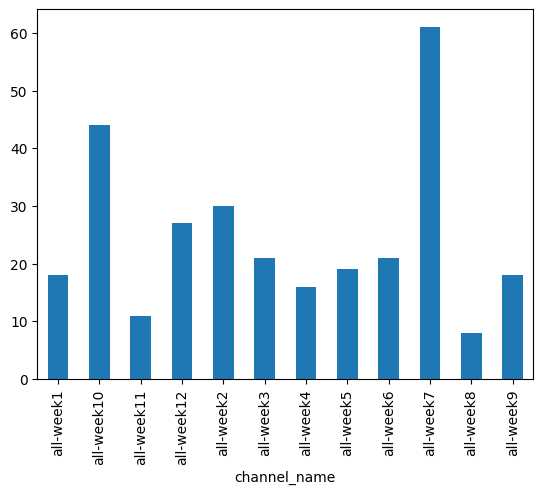

In [34]:
# Visualize reply counts per week
df.groupby(['channel_name'])['reply_count'].max().plot(kind='bar')


<Axes: xlabel='sender_name'>

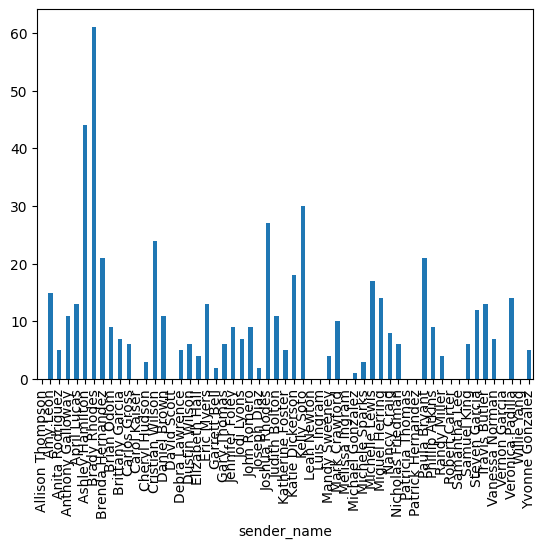

In [36]:
# Visualize reply counts per user
df.groupby(['sender_name'])['reply_count'].max().plot(kind='bar')


In [41]:
# Visualize reply counts per user per channel
user_channel = df.groupby(['channel_name','sender_name'])['reply_count'].max()
user_channel



channel_name  sender_name     
all-week1     Amy Leon            1
              Anita Rodriguez     5
              Anthony Galloway    0
              April Lucas         6
              Ashley Hamilton     1
                                 ..
all-week9     Nancy Craig         2
              Phillip Atkins      0
              Robert Carter       0
              Samuel King         6
              Travis Butler       0
Name: reply_count, Length: 392, dtype: int64

In [43]:
#  =convert it to a pandas datetime object
df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')
df['hour_sent'] = df['msg_sent_time'].dt.hour
hourly_message_counts = df.groupby('hour_sent').size()
max_hour = hourly_message_counts.idxmax()
print(f"The time range with the most messages is from {max_hour}:00 to {(max_hour + 1) % 24}:00")


The time range with the most messages is from 8:00 to 9:00


In [44]:
# what kind of messages are replied faster than others?

df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')
df['tm_thread_end'] = pd.to_datetime(df['tm_thread_end'], unit='s')
df['response_time'] = (df['tm_thread_end'] - df['msg_sent_time']).dt.total_seconds()
average_response_time = df.groupby('msg_type')['response_time'].mean()
print(average_response_time)

msg_type
message   -1.458772e+09
Name: response_time, dtype: float64


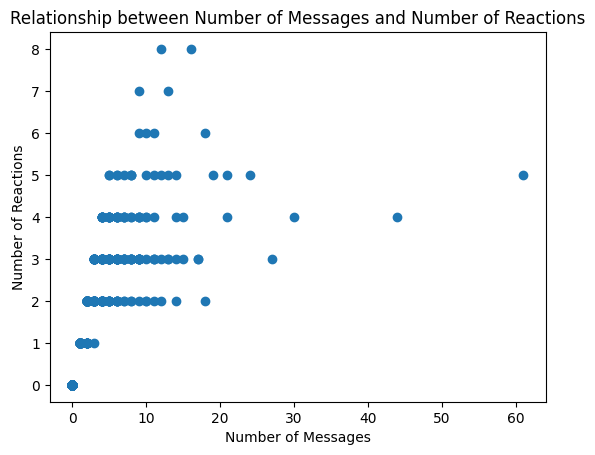

In [45]:
# Relationship between # of messages and # of reactions

plt.scatter(df['reply_count'], df['reply_users_count'])
plt.xlabel('Number of Messages')
plt.ylabel('Number of Reactions')
plt.title('Relationship between Number of Messages and Number of Reactions')
plt.show()

In [46]:
# Classify messages into different categories such as questions, answers, comments, etc.

def classify_message(msg):
    if '?' in msg:
        return 'Question'
    elif 'answer' in msg.lower():
        return 'Answer'
    elif 'help' in msg.lower():
        return 'Request for Help'
    else:
        return 'Other'

df['message_category'] = df['msg_content'].apply(classify_message)
print(df[['msg_content', 'message_category']])

                                            msg_content message_category
0     <https://towardsdatascience.com/how-to-fill-mi...            Other
1     Imputation Using k-NN, Imputation Using Multiv...            Other
2     <https://towardsdatascience.com/6-different-wa...            Other
3     u can use SMOTE or mode to impute categorical ...            Other
4                                            :+1:thanks            Other
...                                                 ...              ...
3337                                                3.8            Other
3338              Thank you, my python version was 3.10            Other
3339  <https://realpython.com/linear-programming-pyt...            Other
3340  <https://stackoverflow.com/questions/70941094/...            Other
3341  <@U03UJGP0C68> <@U03UUR571A5> <@U03V785NLSU> p...            Other

[3342 rows x 2 columns]


In [51]:
# Which users got the most reactions?


user_reaction_counts = df.groupby('sender_name')['reply_users_count'].sum()
sorted_users = user_reaction_counts.sort_values(ascending=False)
print(sorted_users.head(10))

sender_name
Cristian Wilson     158
Michelle Lewis      115
Brenda Hernandez    106
Katie Dickerson      47
Brian Odom           43
Eric Myers           35
Joshua Rhodes        34
Ashley Hamilton      30
Nancy Craig          29
Travis Butler        28
Name: reply_users_count, dtype: int64


In [18]:
# Model topics mentioned in the channel

In [19]:
# What are the topics that got the most reactions?

### Harder questions to look into

In [20]:
# Based on messages, reactions, references shared, and other relevant data such as classification of questions into techical question, comment, answer, aorder stu the python, statistics, and sql skill level of a user?